# Trabajo Semanal 13

Alumno: Francisco Manoukian

## Ejercicio 1

<img src="./consigna_ts13_1.png" width="30%" align="left">

a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.

b) Calcular el valor de los componentes, es decir la síntesis analítica.

<img src="./ts13_1.png" width="90%" align="left">

### Comprobación de la transferencia obtenida mediante SymPy

In [3]:
from generador_matrices import T_R, T_C
import sympy as sp

T1 = T_R(30/7,derivacion=True)
T2 = T_C(49/360,derivacion=True)
T3 = T_R(54/7)
T4 = T_C(1/18,derivacion=True)
T5 = T_R(5)
T6 = T_R(1)

TT = T1*T2*T3*T4*T5*T6

C = TT[1,0]
D = TT[1,1]

t = 6*C/D
den = sp.simplify(sp.fraction(t)[0]/0.35)
num = sp.simplify(sp.fraction(t)[1]/0.35)
den/num

(1.0*s**2 + 5.0*s + 4.0)/(1.0*s**2 + 8.0*s + 12.0)

## Ejercicio 2

<img src="./consigna_ts13_2.png" width="30%" align="left">

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.

b) Verificar la transimpedancia del circuito obtenido y hallar el valor de k.

<img src="./ts13_2.png" width="90%" align="left">

### Simulación simbólica por matrices T

In [82]:
from generador_matrices import s
from IPython.display import display,Math

T1 = sp.Matrix([[1,0],[(4*s**2+2)/(3*s),1]])
T2 = sp.Matrix([[(s+2)/2,s/2],[1,1]])

TT = T1*T2
n,d = sp.fraction(sp.simplify(sp.expand(TT[1,0])))
display(Math(r'T_1 = ' + sp.latex(sp.expand(T1))))
display(Math(r'T_2 = ' + sp.latex(sp.expand(T2))))
display(Math(r'T_T = ' + sp.latex(sp.expand(TT))))
display(Math(r'T(s) = \frac{V_2}{I_1} = \frac{1}{C} = ' + sp.latex(d/sp.expand(n))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Simulación numérica de la función propuesta

(0.0015915494309189536, 15.915494309189533)

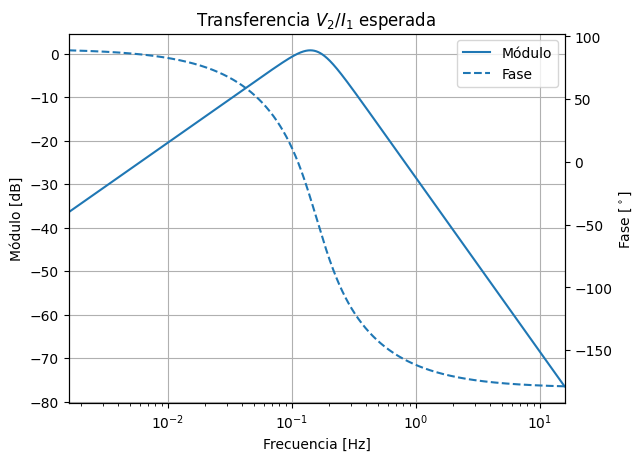

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

T2_num = [1.5,0]
T2_den = [1,2,2,1]

w,t = sig.freqs(b=T2_num, a=T2_den, worN=np.logspace(-2,2,10**5))

fig,ax1 = plt.subplots()
ax1.set_title('Transferencia $V_2/I_1$ esperada')
ax2 = ax1.twinx()

f = w/(2*np.pi)

l1 = ax1.semilogx(f,20*np.log10(np.abs(t)),label='Módulo')
l2 = ax2.semilogx(f,np.angle(t,deg=True),linestyle='dashed',label='Fase')

l = [l.get_label() for l in l1+l2]
ax1.legend(l1+l2,l,loc='upper right')

ax1.grid(True)
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Módulo [dB]')
ax2.set_ylabel('Fase [$^\circ$]')

plt.xlim([f[0],f[-1]])

### Simulación circuital de la red obtenida

Dado que el simulador no computa los parámetros T de la red, se busca la equivalencia a la transferencia propuesta utilizando parámetros Z:

$\frac{V_2}{I_1} = Z_{21}$ (que concuerda con la condición de medición $(-I_2)=0$)

<img src="./spice_2_transf.png">

<img src="./spice_2_circ.png" width="30%">